<a href="https://colab.research.google.com/github/jdasam/mas1004-2022/blob/main/notebooks/Data_AI_9th_week_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

DEV = 'cuda'

In [2]:
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# See how our data looks like
# you can get the i-th data from the dataset class using dataset[i]
train_data[0] # this will return (image tensor, label)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [4]:
img, label = train_data[0] # A datasample is a pair of image and label

In [5]:
img.shape

torch.Size([1, 28, 28])

In [6]:
# you can delete axis that has only one item by squeeze
img = img.squeeze() # or img = img[0] or img = img[0, :, : ]
img.shape

torch.Size([28, 28])

Label is 5


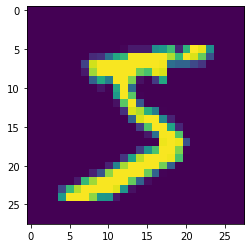

In [7]:
plt.imshow(img), 
print(f'Label is {label}') # f means formatted string

Label is 5


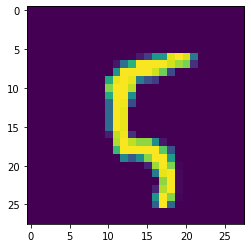

In [8]:
data_idx = 100
img, label = train_data[data_idx]
plt.imshow(img.squeeze())
print(f'Label is {label}')



In [9]:
# how many data exists in our train_data?
len(train_data)

60000

In [11]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=784, out_features=64)
    self.layer2 = nn.Linear(in_features=64, out_features=77)
    self.final_layer = nn.Linear(in_features=77, out_features=10)
    self.relu = nn.ReLU()


  def forward(self, x): # x is an input
    # x is a tensor with a shape of [Num samples, 784]
    out = self.layer1(x)
    out = self.relu(out)
    out = self.layer2(out)
    out = self.relu(out)
    out = self.final_layer(out)

    # we want to predict the probability of each category label for a given input
    # we have 10 different categories in our dataset
    return out

model = Classifier()
# out = model(flattened_data)
# out[0] # the output for 0-th data sample

## Dataset

In [70]:
import random
random_order = list(range(784))
random.shuffle(random_order)
random_order

[442,
 153,
 511,
 72,
 518,
 174,
 781,
 331,
 418,
 210,
 582,
 104,
 216,
 253,
 608,
 762,
 706,
 319,
 417,
 656,
 733,
 209,
 142,
 8,
 416,
 381,
 36,
 356,
 290,
 166,
 485,
 555,
 373,
 412,
 614,
 613,
 780,
 392,
 537,
 110,
 213,
 324,
 237,
 250,
 194,
 40,
 41,
 0,
 512,
 498,
 270,
 53,
 395,
 431,
 721,
 703,
 622,
 409,
 128,
 772,
 755,
 232,
 763,
 639,
 29,
 168,
 298,
 445,
 728,
 190,
 81,
 306,
 372,
 687,
 769,
 137,
 644,
 685,
 131,
 637,
 737,
 105,
 414,
 121,
 607,
 517,
 163,
 217,
 394,
 684,
 257,
 358,
 453,
 325,
 90,
 648,
 243,
 756,
 156,
 70,
 317,
 201,
 441,
 694,
 459,
 380,
 307,
 39,
 23,
 430,
 148,
 516,
 333,
 93,
 438,
 342,
 192,
 212,
 682,
 122,
 726,
 286,
 202,
 504,
 327,
 305,
 113,
 25,
 704,
 672,
 624,
 265,
 495,
 275,
 426,
 597,
 277,
 605,
 226,
 698,
 773,
 96,
 195,
 47,
 428,
 563,
 469,
 580,
 292,
 299,
 28,
 374,
 284,
 523,
 336,
 499,
 711,
 519,
 330,
 651,
 24,
 75,
 419,
 462,
 150,
 434,
 387,
 347,
 440,
 222,
 5

In [73]:
# implementing a custom dataset class
class Dataset:
  def __init__(self, img, label):
    self.img = img # tensor that has shape of [num_samples, height, width]
    self.label = label # tensor that has shape of [num_samples]


  def __len__(self):
    return len(self.img)

  def __getitem__(self, idx):
    # getitem is a method that returns idx-th sample of the dataset
    # return an idx-th image and idx-th label

    # this function is called by Dataset()[10]
    return self.img[idx].reshape(-1)[random_order]/256, self.label[idx]

our_train_data = Dataset(train_data.data, train_data.targets)
img, label = our_train_data[10]
img.shape, label.shape

(torch.Size([784]), torch.Size([]))

In [74]:
our_train_data[0]

(tensor([0.9844, 0.9609, 0.9844, 0.0000, 0.0000, 0.0000, 0.0000, 0.4648, 0.0000,
         0.9883, 0.0000, 0.0000, 0.9844, 0.0000, 0.0000, 0.0000, 0.0000, 0.9727,
         0.0000, 0.9844, 0.0000, 0.9844, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.6758, 0.9844, 0.0000, 0.0000, 0.0000, 0.9844, 0.6797, 0.0000, 0.0000,
         0.0000, 0.0000, 0.9844, 0.0000, 0.8555, 0.0000, 0.9844, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.3125, 0.0664, 0.2070, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.8789, 0.0000, 0.9883, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.9844, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.9883, 0.0000, 0.0000, 0.0000, 0.0000, 0.8008, 0.0000, 0.0000,
         0.0000, 0.9844, 0.9805, 0.0000, 0.0000, 0.0000, 0.9844, 0.0000, 0.9844,
         0.0000, 0.9844, 0.0000, 0.9844, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [29]:
len(our_train_data)

60000

In [36]:
train_loader = torch.utils.data.DataLoader(our_train_data, batch_size=64)

loader_iterator = iter(train_loader)
# batch = next(iter(train_loader))

for batch in train_loader:
  imgs, labels = batch
  # same with below
  # imgs = batch[0]
  # labels = batch[1]

  # print(labels)
  break

In [39]:
imgs.shape, labels.shape

(torch.Size([64, 784]), torch.Size([64]))

In [34]:
# next(loader_iterator)
# 

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6,
         1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
         9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5])]

In [20]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

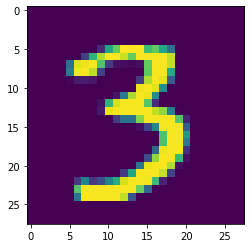

In [17]:
plt.imshow(train_data.data[10000])

In [40]:
# DataLoader helps you to compose a batch of datasample from the Dataset
train_loader = torch.utils.data.DataLoader(our_train_data, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)
next(iter(train_loader))

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
         1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
         9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])]

In [48]:
# To examine how important the data order is, sort the data by class
sorted_indices = torch.argsort(train_data.targets)
train_data.data = train_data.data[sorted_indices]
train_data.targets = train_data.targets[sorted_indices]

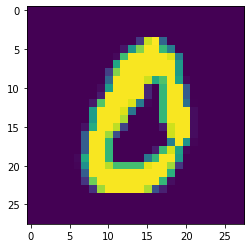

In [58]:
plt.imshow(train_data.data[5000])

In [62]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=256, shuffle=False)

batch = next(iter(train_loader))
print(batch[1])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [41]:
def get_nll_loss(pred, target):
  return -pred[torch.arange(len(target)), target].log().mean()

In [75]:
from tqdm.auto import tqdm

num_epochs = 3

model = Classifier()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train_loader = torch.utils.data.DataLoader(our_train_data, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

model.to(DEV)
loss_record = []
for i in tqdm(range(num_epochs)):
  for batch in tqdm(train_loader, leave=False):
    img, label = batch
    pred = model(img.reshape(-1, 784).to(DEV))
    prob = pred.softmax(dim=-1)
    loss = get_nll_loss(prob, label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_record.append(loss.item())

    

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

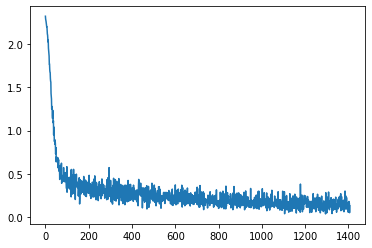

In [76]:
import matplotlib.pyplot as plt

plt.plot(loss_record)